<a href="https://colab.research.google.com/github/dipayandas97/Indoor-Navigation-System/blob/master/Indoor%20position%20mapping%20(LOS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import drive
import seaborn as sns
drive.mount('/content/drive/')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


#Data extraction

##Main room data

In [0]:
filepath = '/content/drive/My Drive/Final_year_project/Data_collected/'

os.chdir(filepath+'phase_1/')
phase1_file_names = os.listdir()

os.chdir(filepath+'phase_2/')
phase2_file_names = os.listdir()

In [0]:
data = []

for i in range(1,6):
    for j in range(1,12):
        d_filename = str(i)+'_'+str(j)+'.txt'
        #Extract data from phase_1
        d1 = pd.read_csv(filepath+'phase_1/'+d_filename, sep='\t', header=None).to_numpy()
        #Extract data from phase 2
        d2 = pd.read_csv(filepath+'phase_2/'+d_filename, sep='\t', header=None).to_numpy()
        #combine data
        d = np.hstack((d1,d2))
        #prepare label
        label = [[i,j] for z in range(100)]
        #save data
        d_set = np.hstack((d,label))
        data.append(d_set)

In [0]:
DATA = []
for i in range(len(data)):
    d = [x for x in data[i]]
    for j in range(len(d)):
        DATA.append([x for x in d[j]])
DATA = np.asarray(DATA)
print('Number of datapoints:',len(DATA))
print('Shape of dataset:',DATA.shape)

Number of datapoints: 5500
Shape of dataset: (5500, 6)


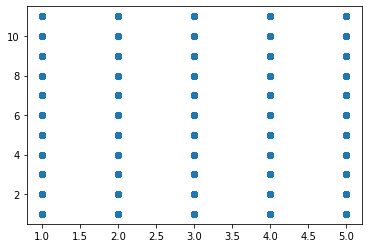

In [0]:
plt.scatter(DATA[:,-2], DATA[:,-1])

In [0]:
DATA

array([[-35, -58, -53, -66,   1,   1],
       [-35, -66, -63, -42,   1,   1],
       [-32, -64, -55, -41,   1,   1],
       ...,
       [-51, -29, -42, -39,   5,  11],
       [-54, -30, -42, -48,   5,  11],
       [-51, -28, -51, -46,   5,  11]])

In [0]:
import pickle
f = open('/content/drive/My Drive/Final_year_project/dataset.pkl', 'wb')
pickle.dump(DATA, f)
f.close()

##main room data in dB

In [0]:
data_db = []
for i in range(DATA.shape[0]):
    X = DATA[i][:4] - 30
    X = np.hstack((X, DATA[i][-2:]))
    data_db.append(X)
data_db = np.asarray(data_db)

##Corridor data

In [0]:
filepath = '/content/drive/My Drive/Final_year_project/Data_collected/ref_power/'

os.chdir(filepath)
ref_files = os.listdir()

In [0]:
tenda = []
aviator = []

for i in range(20):
    filename = 'tenda_'+str(i+1)+'m.txt'
    d = pd.read_csv(filepath+filename, header=None).to_numpy()
    d = [x[0] for x in d]
    tenda.append(d)
    
    filename = 'a_'+str(i+1)+'m.txt'
    d = pd.read_csv(filepath+filename, header=None).to_numpy()
    d = [x[0] for x in d]
    aviator.append(d)

In [0]:
mean_t = [np.mean(x) for x in tenda]
mean_a = [np.mean(x) for x in aviator]

In [0]:
print(mean_t[0])

-35.0


In [0]:
m = [35.        , 45.84      , 49.88      , 68.42      , 73.96      ,
       73.34      , 70.88      , 74.59333333, 74.18      , 80.76      ,
       88.4       , 82.94      , 92.08      , 91.1       , 109.24      ,
       96.24      , 91.04      , 101.98      , 114.86      , 113.5       ]

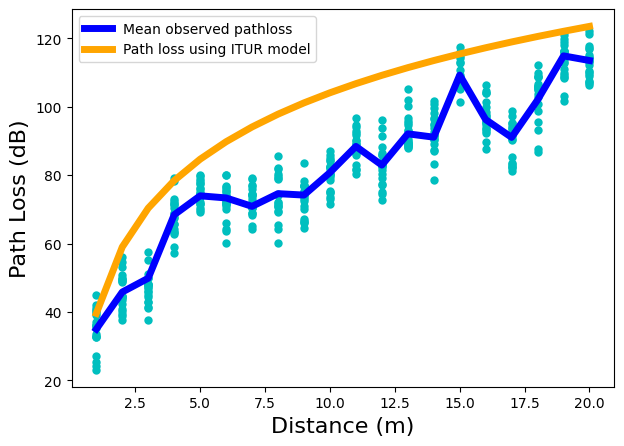

In [0]:
#ITUR indoor site general path loss model VS experimented data plot (in dB)
plt.figure(figsize=(7,5), dpi=100)
plt.plot(np.arange(1,21,1),m, linewidth=5, color='blue', label='Mean observed pathloss')

d = np.arange(1,21,1)
L = (39.6 + 28*np.log(d))
plt.plot(d, L, linewidth=5, color='orange', label='Path loss using ITUR model')
plt.xlabel('Distance (m)', fontsize=16)
plt.ylabel('Path Loss (dB)', fontsize=16)

for i in range(20):
    n = np.random.normal(loc = m[i], scale = 5, size=20)
    x = [i+1]*20
    plt.scatter(x, n, marker='o', c = 'c', linewidths=0.01)
plt.legend()

#Data analysis

In [0]:
import pickle
f = open('/content/drive/My Drive/Final_year_project/dataset.pkl', 'rb')
DATA = pickle.load(f)
f.close()

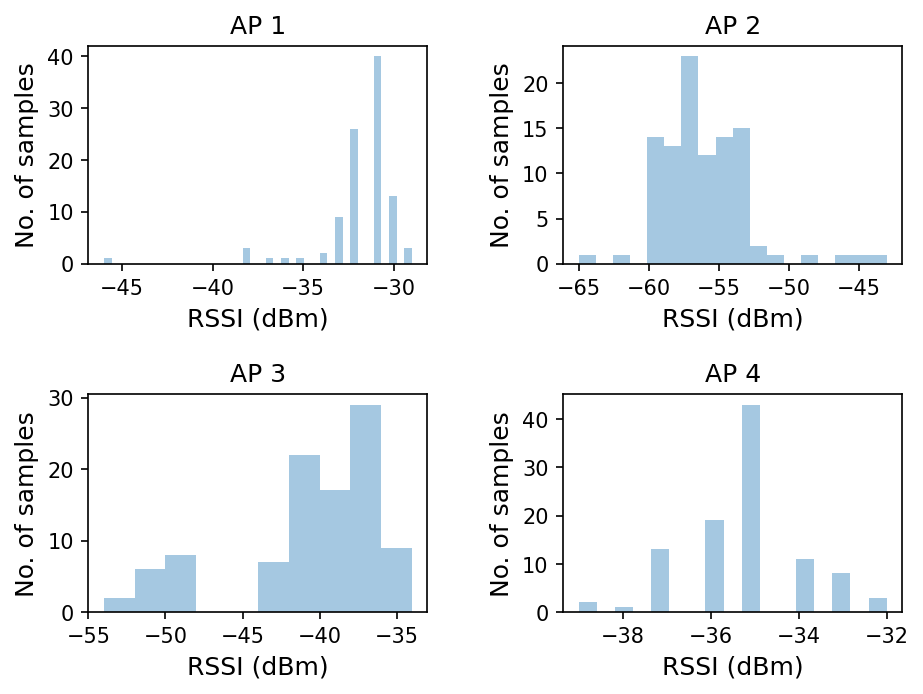

In [0]:
s = 5
plt.figure(figsize=(7,5), dpi=150)
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(2,2,1)
plt.xlabel('RSSI (dBm)', fontsize=12)
plt.ylabel('No. of samples', fontsize=12)
plt.title('AP 1')
sns.distplot(data[s][:,0], kde=False)
plt.subplot(2,2,2)
plt.xlabel('RSSI (dBm)', fontsize=12)
plt.ylabel('No. of samples', fontsize=12)
plt.title('AP 2')
sns.distplot(data[s][:,1], kde=False)
plt.subplot(2,2,3)
plt.xlabel('RSSI (dBm)', fontsize=12)
plt.ylabel('No. of samples', fontsize=12)
plt.title('AP 3')
sns.distplot(data[s][:,2], kde=False)
plt.subplot(2,2,4)
plt.xlabel('RSSI (dBm)', fontsize=12)
plt.ylabel('No. of samples', fontsize=12)
plt.title('AP 4')
sns.distplot(data[s][:,3], kde=False)
plt.show()

Router  1


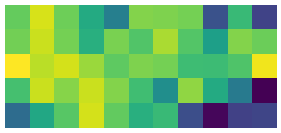

Router  2


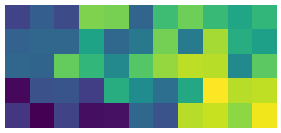

Router  3


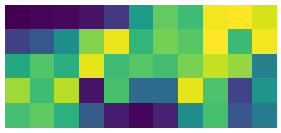

Router  4


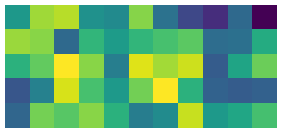

In [0]:
#using data from cell 4
heat_map = np.zeros((5,11))
for e in range(4):
    print('Router ',e+1)
    for i in range(5):
        for j in range(11):
            heat_map[i][j] = np.mean(data[(i*11)+j][:,e])
    plt.figure(figsize=(7,5), dpi=50)
    plt.axis('off')
    plt.imshow(heat_map)
    plt.show()

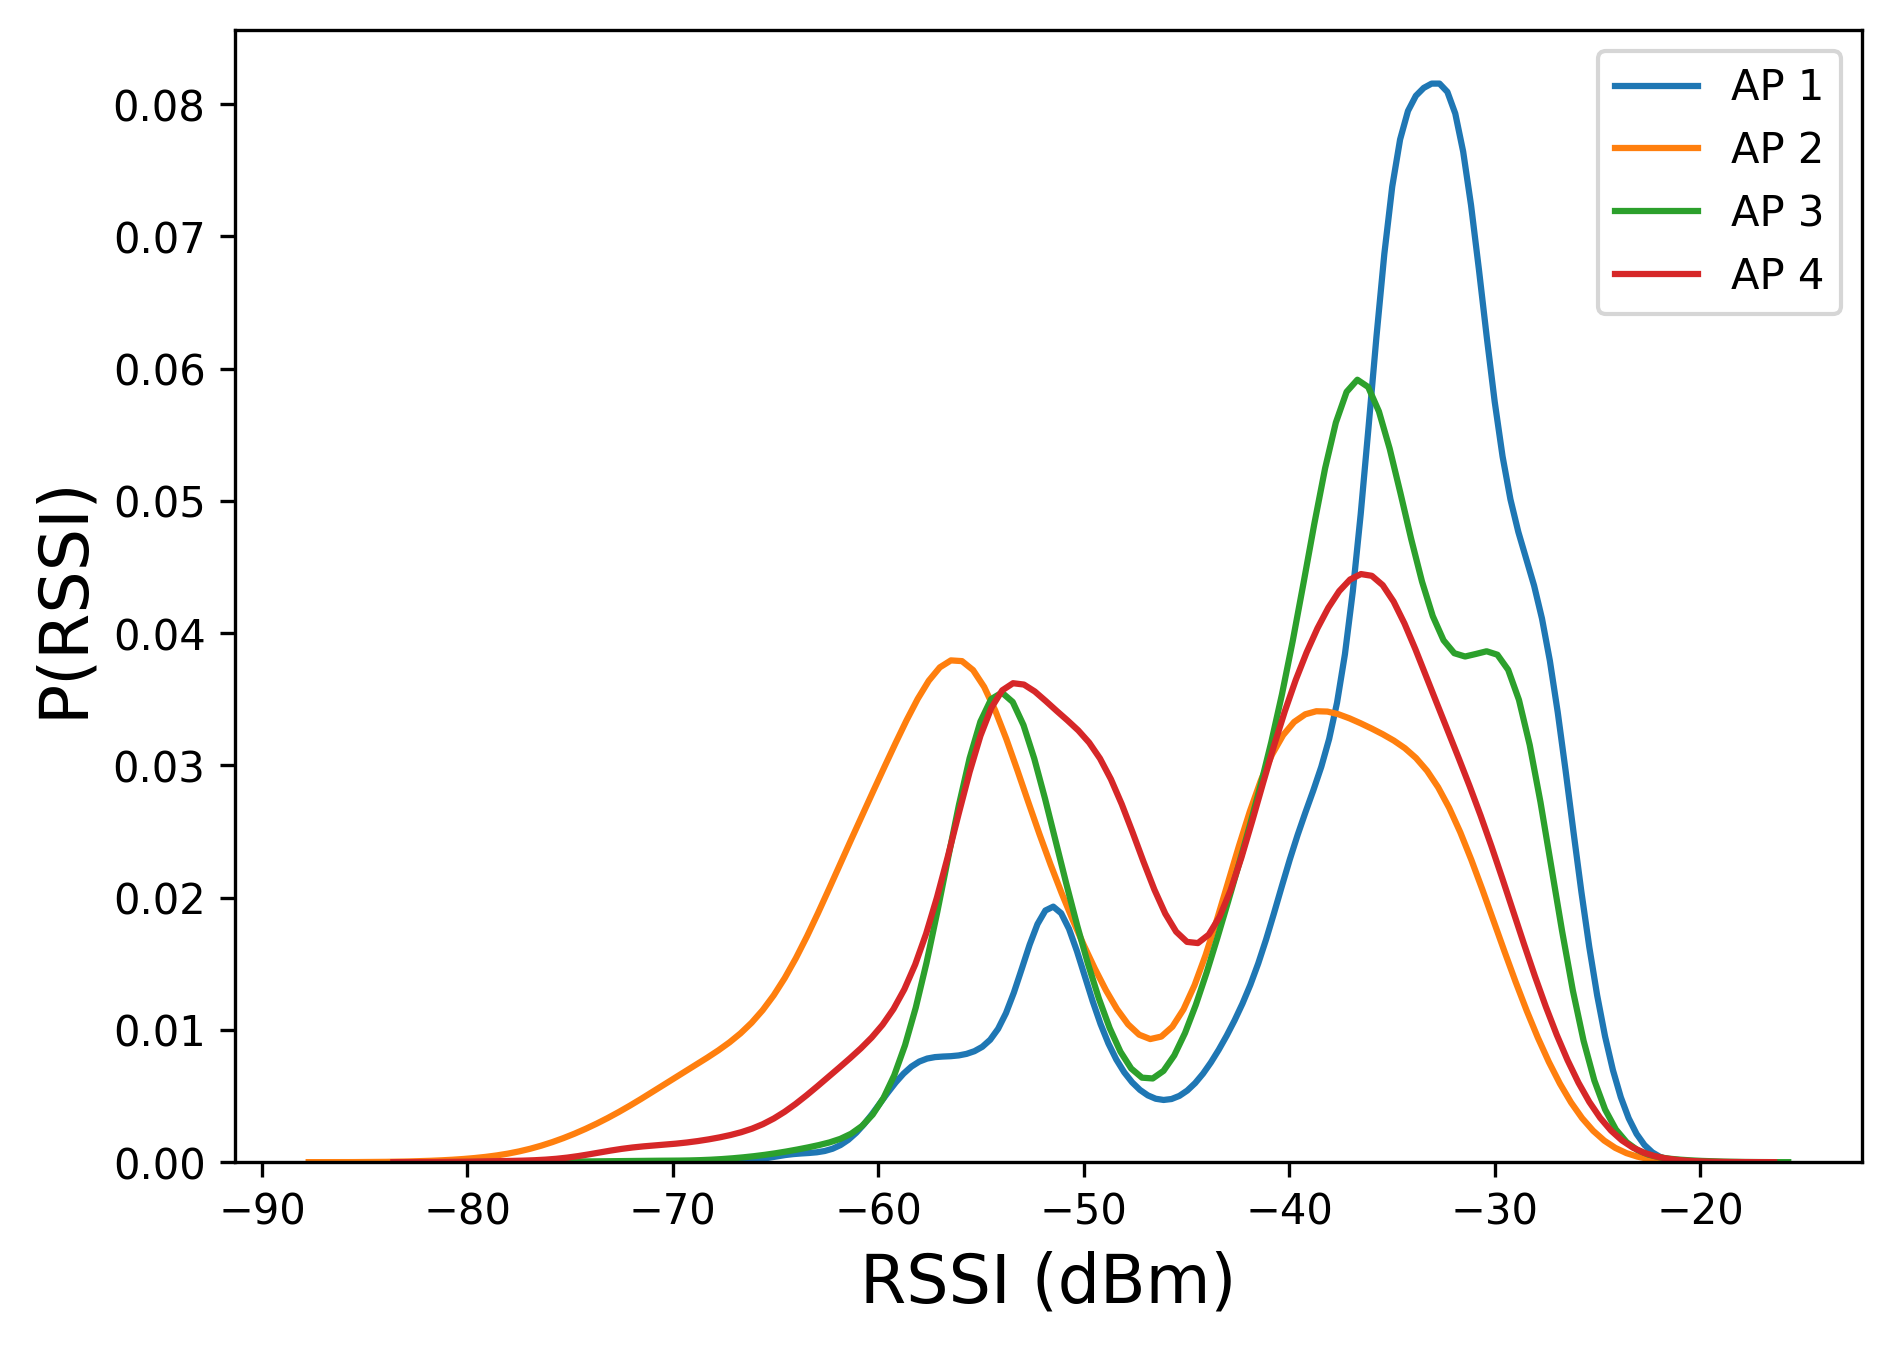

In [0]:
import seaborn as sns
plt.figure(figsize=(7,5), dpi=300)
plt.xlabel('RSSI (dBm)', fontsize=16)
plt.ylabel('P(RSSI)', fontsize=16)
sns.kdeplot(DATA[:,0], label='AP 1')
sns.kdeplot(DATA[:,1], label='AP 2')
sns.kdeplot(DATA[:,2], label='AP 3')
sns.kdeplot(DATA[:,3], label='AP 4')
plt.show()

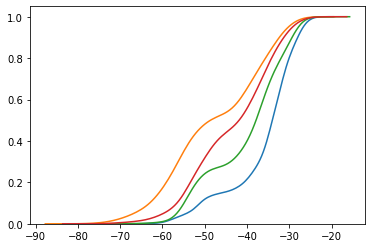

In [0]:
import seaborn as sns
sns.kdeplot(DATA[:,0], cumulative=True)
sns.kdeplot(DATA[:,1], cumulative=True)
sns.kdeplot(DATA[:,2], cumulative=True)
sns.kdeplot(DATA[:,3], cumulative=True)
plt.show()

#Models

In [0]:
import pickle
f = open('/content/drive/My Drive/Final_year_project/dataset.pkl', 'rb')
DATA = pickle.load(f)
f.close()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = DATA[:,:4].astype(np.float)
y = DATA[:, -2:].astype(np.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size=0.1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4950, 4) (4950, 2)
(550, 4) (550, 2)


##Trilateration

In [0]:
#pass X_test array in dBm and y_test in empirical unit --> returns [d1,d2,d3,d4,x,y] : all in meter
def convert_to_dist_data(x,y):
    dist_data = []
    for i in range(x.shape[0]):
        pl = -1*(x[i] - 30)
        d = np.asarray([10**((x-65)/28) for x in pl])
        l = np.asarray([y[i][-2] * 0.7, y[i][-1] * 0.6] )
        d = np.hstack((d,l))
        dist_data.append(d)
    dist_data = np.asarray(dist_data)
    return dist_data

In [0]:
def find_pos(d): #pass numpy array of 3 distances from 3 APS
    ax, ay, bx, by, cx, cy = 4.2, 0, 4.2, 7.2, 0, 7.2 #AP1, AP2, AP3
    d1, d2, d3 = d[0], d[1], d[2]
    A = 2*(ax-bx)
    B = 2*(ay-by)
    C1 = (bx**2) - (ax**2) - (ay**2) + (by**2) + (d1**2) - (d2**2)
    E = 2*(bx-cx)
    F = 2*(by-cy) 
    C2 = (cx**2) - (bx**2) - (by**2) + (cy**2) + (d2**2) - (d3**2)

    P = np.asarray([[A,B],[E,F]])
    Q = np.asarray([-C1,-C2])
    pos = np.dot(np.linalg.inv(P), Q)
    return pos

In [0]:
#Evaluate triangulation on X_test
test_data_in_meter= convert_to_dist_data(X_test,y_test)

tri_pos = []
true_pos = test_data_in_meter[:,-2:]
for i in range(test_data_in_meter.shape[0]):
    d = test_data_in_meter[i][:3]
    pos = find_pos(d)
    tri_pos.append(pos)

error_tri = []
for e in range(len(true_pos)):
    error_tri.append(np.sqrt((tri_pos[e][0] - true_pos[e][0])**2 + (tri_pos[e][1] - true_pos[e][1])**2))

mean MSE error: 204.77781587745793
Std of MSE error: 13.07021880625509


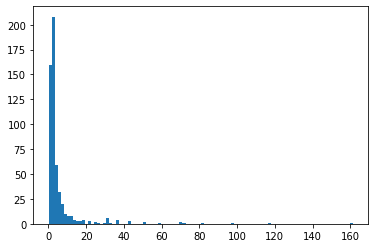

In [0]:
print('mean MSE error:', np.mean(np.asarray(error_tri)**2))
print('Std of MSE error:',np.std(error_tri))

plt.hist(np.asarray(error_tri), bins=100)
plt.show()

##Standarize data for ML/DL models


In [0]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

##Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [0]:
#convert to meter
s = np.asarray([0.7, 0.6])
y_pred_m = np.asarray([np.multiply(x,s) for x in y_pred])
y_test_m = np.asarray([np.multiply(x,s) for x in y_test])

error_lr = []
for e in range(y_pred_m.shape[0]):
    error_lr.append(np.sqrt((y_pred_m[e][0] - y_test_m[e][0])**2 + (y_pred_m[e][1] - y_test_m[e][1])**2))

MSE error: 2.400442147037358
Std of SE error: 0.6978386553330284


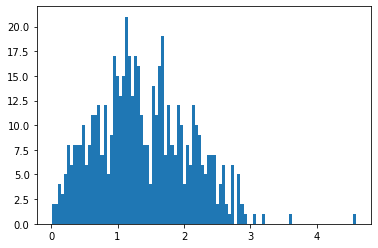

In [0]:
print('MSE error:', np.mean(np.asarray(error_lr)**2))
print('Std of SE error:',np.std(error_lr))

plt.hist(np.asarray(error_lr), bins=100)
plt.show()

##NN

In [0]:
from keras.layers import *
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(4,))
x = Dense(128, activation='relu')(inp)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

In [0]:
history = model.fit(X_train, y_train, epochs = 200, batch_size=16, validation_data=(X_test, y_test), callbacks=[lr])

Train on 4950 samples, validate on 550 samples
Epoch 1/200
4950/4950 [==============================] - 1s 114us/step - loss: 3.9261 - val_loss: 3.3509
Epoch 2/200
4950/4950 [==============================] - 0s 84us/step - loss: 3.4658 - val_loss: 3.0196
Epoch 3/200
4950/4950 [==============================] - 0s 85us/step - loss: 3.2560 - val_loss: 2.9924
Epoch 4/200
4950/4950 [==============================] - 0s 85us/step - loss: 3.0737 - val_loss: 2.7524
Epoch 5/200
4950/4950 [==============================] - 0s 83us/step - loss: 2.9494 - val_loss: 2.8737
Epoch 6/200
4950/4950 [==============================] - 0s 82us/step - loss: 2.8905 - val_loss: 2.7432
Epoch 7/200
4950/4950 [==============================] - 0s 85us/step - loss: 2.8405 - val_loss: 2.5905
Epoch 8/200
4950/4950 [==============================] - 0s 85us/step - loss: 2.7046 - val_loss: 2.6660
Epoch 9/200
4950/4950 [==============================] - 0s 84us/step - loss: 2.5799 - val_loss: 2.3088
Epoch 10/200
495

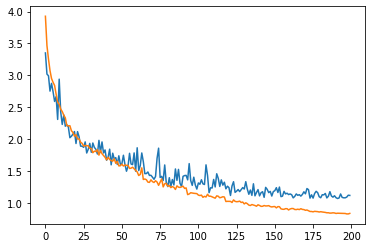

In [0]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

In [0]:
y_pred = model.predict(X_test)
#convert to meter
s = np.asarray([0.7, 0.6])
y_pred_m = np.asarray([np.multiply(x,s) for x in y_pred])
y_test_m = np.asarray([np.multiply(x,s) for x in y_test])

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred_m[e][0] - y_test_m[e][0])**2 + (y_pred_m[e][1] - y_test_m[e][1])**2))

MSE error: 0.874276017498632
Std of SE error: 0.675838700674569


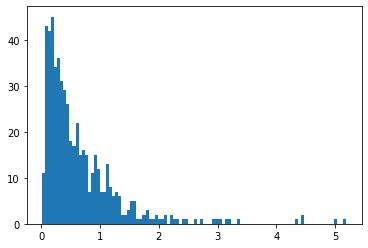

In [0]:
print('MSE error:', np.mean(np.asarray(error_nn)**2))
print('Std of SE error:',np.std(error_nn))

plt.hist(np.asarray(error_nn), bins=100)
plt.show()

#AE


In [0]:
from keras.layers import *
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(4,))
en = Dense(4, activation='relu')(inp)
x = Dense(4, activation='relu')(en)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

In [0]:
history = model.fit(X_train, X_train, epochs = 200, batch_size=16, validation_data=(X_test, X_test), callbacks=[lr])

Train on 4950 samples, validate on 550 samples
Epoch 1/200
4950/4950 [==============================] - 0s 72us/step - loss: 0.9226 - val_loss: 0.8277
Epoch 2/200
4950/4950 [==============================] - 0s 61us/step - loss: 0.8209 - val_loss: 0.7753
Epoch 3/200
4950/4950 [==============================] - 0s 64us/step - loss: 0.7950 - val_loss: 0.7680
Epoch 4/200
4950/4950 [==============================] - 0s 61us/step - loss: 0.7924 - val_loss: 0.7674
Epoch 5/200
4950/4950 [==============================] - 0s 60us/step - loss: 0.7919 - val_loss: 0.7671
Epoch 6/200
4950/4950 [==============================] - 0s 59us/step - loss: 0.7915 - val_loss: 0.7668
Epoch 7/200
4950/4950 [==============================] - 0s 59us/step - loss: 0.7912 - val_loss: 0.7665
Epoch 8/200
4950/4950 [==============================] - 0s 61us/step - loss: 0.7909 - val_loss: 0.7663
Epoch 9/200
4950/4950 [==============================] - 0s 59us/step - loss: 0.7907 - val_loss: 0.7661
Epoch 10/200
4950

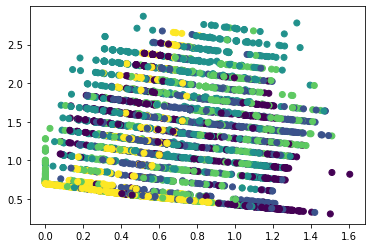

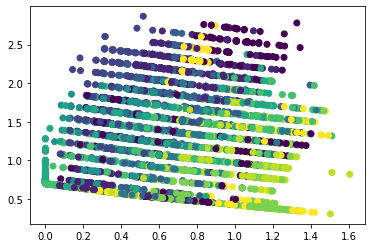

In [0]:
encoder = Model(inp, en)
encoded = encoder.predict(X_train)

plt.scatter(encoded[:,0], encoded[:,1], c = y_train[:,0])
plt.show()
plt.scatter(encoded[:,0], encoded[:,1], c = y_train[:,1])

In [0]:
from sklearn.linear_model import LinearRegression

encoded_train = encoder.predict(X_train)

regressor = LinearRegression()
regressor.fit(encoded_train, y_train)

encoded_test = encoder.predict(X_test)
y_pred = regressor.predict(encoded_test)

In [0]:
#convert to meter
s = np.asarray([0.7, 0.6])
y_pred_m = np.asarray([np.multiply(x,s) for x in y_pred])
y_test_m = np.asarray([np.multiply(x,s) for x in y_test])

error_lr = []
for e in range(y_pred_m.shape[0]):
    error_lr.append(np.sqrt((y_pred_m[e][0] - y_test_m[e][0])**2 + (y_pred_m[e][1] - y_test_m[e][1])**2))

MSE error: 1.6550822059907904
Std of SE error: 0.8550031187369912


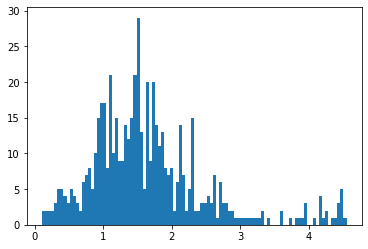

In [0]:
print('MSE error:', np.mean(np.asarray(error_lr)))
print('Std of SE error:',np.std(error_lr))

plt.hist(np.asarray(error_lr), bins=100)
plt.show()

##KNR

mean MSE error: 1.2029818181818182
Std of SE error: 1.023177336122058


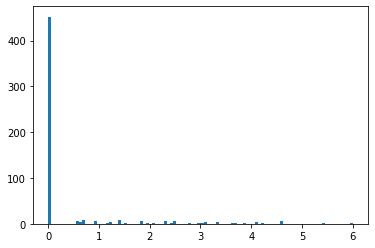

In [0]:
from sklearn.neighbors import KNeighborsRegressor as KNNR

model = KNNR(n_neighbors = 1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#convert to meter
s = np.asarray([0.7, 0.6])
y_pred_m = np.asarray([np.multiply(x,s) for x in y_pred])
y_test_m = np.asarray([np.multiply(x,s) for x in y_test])

error_knnr = []
for e in range(y_pred_m.shape[0]):
    error_knnr.append(np.sqrt((y_pred_m[e][0] - y_test_m[e][0])**2 + (y_pred_m[e][1] - y_test_m[e][1])**2))

print('mean MSE error:', np.mean(np.asarray(error_knnr)**2))
print('Std of SE error:',np.std(error_knnr))

plt.hist(np.asarray(error_knnr), bins=100)
plt.show()

##Plot


NameError: ignored

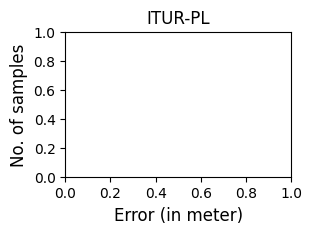

In [0]:
plt.figure(figsize=(7,5), dpi=100)
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(2,2,1)
plt.xlabel('Error (in meter)', fontsize=12)
plt.ylabel('No. of samples', fontsize=12)
plt.title('ITUR-PL')
plt.hist(np.asarray(error_tri), bins=100)
plt.subplot(2,2,2)
plt.xlabel('Error (in meter)', fontsize=12)
plt.ylabel('No. of samples', fontsize=12)
plt.title('LR')
plt.hist(np.asarray(error_lr), bins=100)
plt.subplot(2,2,3)
plt.xlabel('Error (in meter)', fontsize=12)
plt.ylabel('No. of samples', fontsize=12)
plt.title('NN')
plt.hist(np.asarray(error_nn), bins=100)
plt.subplot(2,2,4)
plt.xlabel('Error (in meter)', fontsize=12)
plt.ylabel('No. of samples', fontsize=12)
plt.title('NNR')
plt.hist(np.asarray(error_knnr), bins=100)

plt.show()


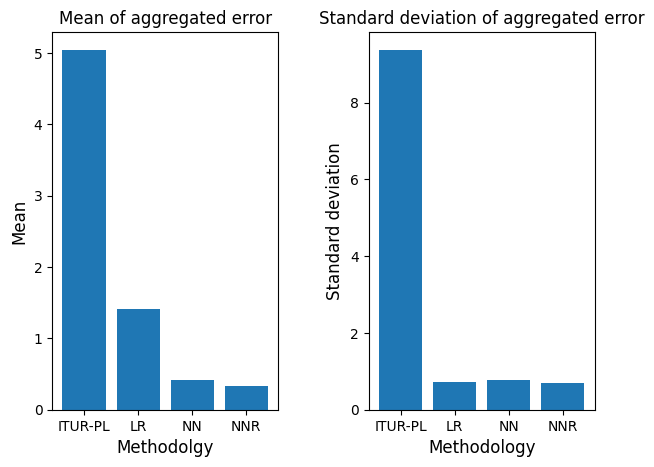

In [0]:
plt.figure(figsize=(7,5), dpi=100)
plt.subplots_adjust(wspace=0.4, hspace=0.6)

x = ['ITUR-PL','LR','NN','NNR']
mean = [5.038, 1.409, 0.422, 0.339]
std = [9.365, 0.710, 0.763, 0.685]

plt.subplot(1,2,1)
plt.xlabel('Methodolgy', fontsize=12)
plt.ylabel('Mean', fontsize=12)
plt.title('Mean of aggregated error')
plt.bar(x, mean)

plt.subplot(1,2,2)
plt.xlabel('Methodology', fontsize=12)
plt.ylabel('Standard deviation', fontsize=12)
plt.title('Standard deviation of aggregated error')
plt.bar(x, std)
plt.show()